# Priyabrata Maity


The Spark Foundation

Task 3 : Exploratory Data Analysis - Retail

Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing the given dataset

In [4]:
url = 'https://raw.githubusercontent.com/kislay960/The-Sparks-Foundation/master/SampleSuperstore.csv'
store = pd.read_csv(url)

In [5]:
store

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


basic information about the given dataset


In [6]:
store.shape

(9994, 13)

In [7]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Checking if there are any missing values in the dataset

In [10]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Check if there are any duplicate values in the dataset

In [11]:
store.duplicated().sum()

17

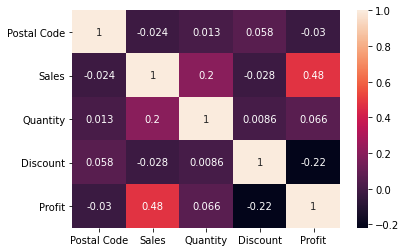

In [12]:
corr = store.corr()
sns.heatmap(corr, annot=True)

To plot multiple pairwise bivariate distributions

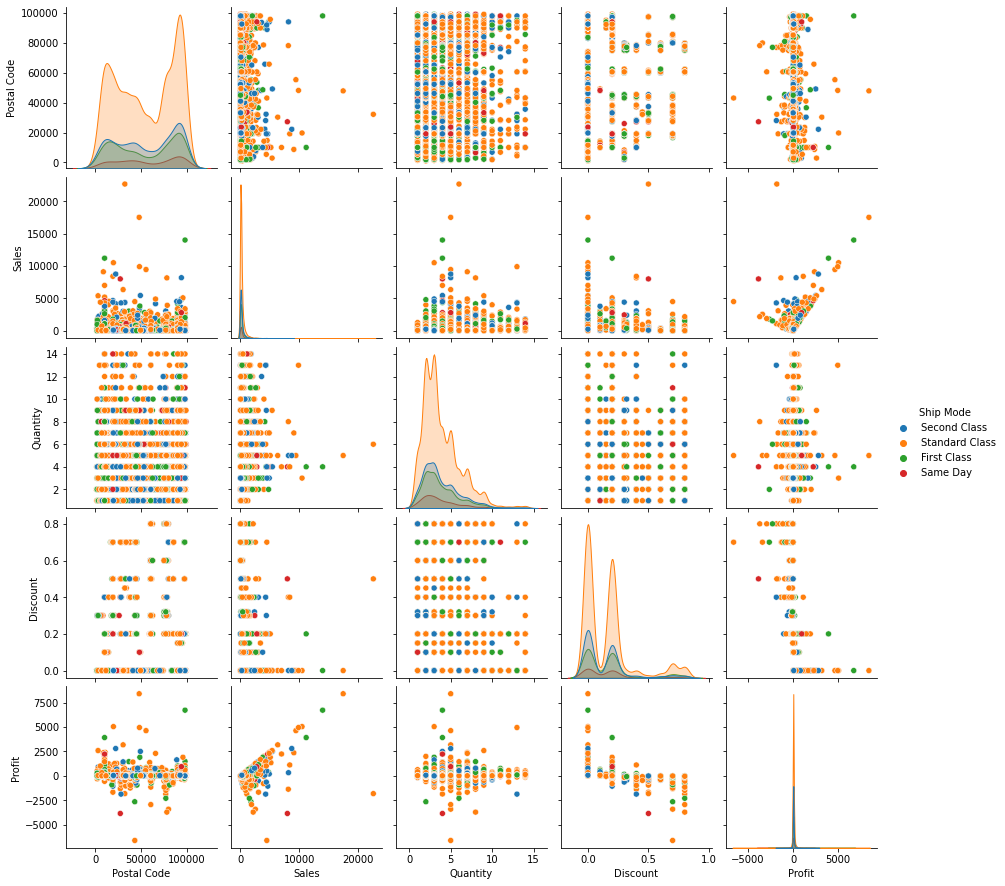

In [13]:
sns.pairplot(store, hue="Ship Mode")

Analysis of the Ship mode

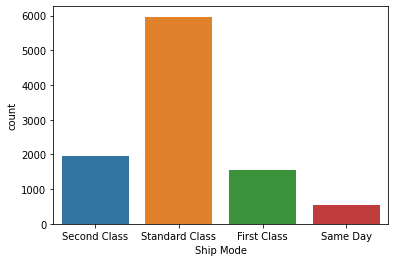

In [14]:
sns.countplot(x=store['Ship Mode'])
plt.show()

In [15]:
store.groupby('Ship Mode').mean()

,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
First Class,54765.611834,228.497024,3.701560,0.164610,31.839948
Same Day,57536.082873,236.396179,3.609576,0.152394,29.266591
Second Class,55626.009254,236.089239,3.816452,0.138895,29.535545
Standard Class,54944.447051,227.583067,3.819873,0.160023,27.494770


Analysis of Segments

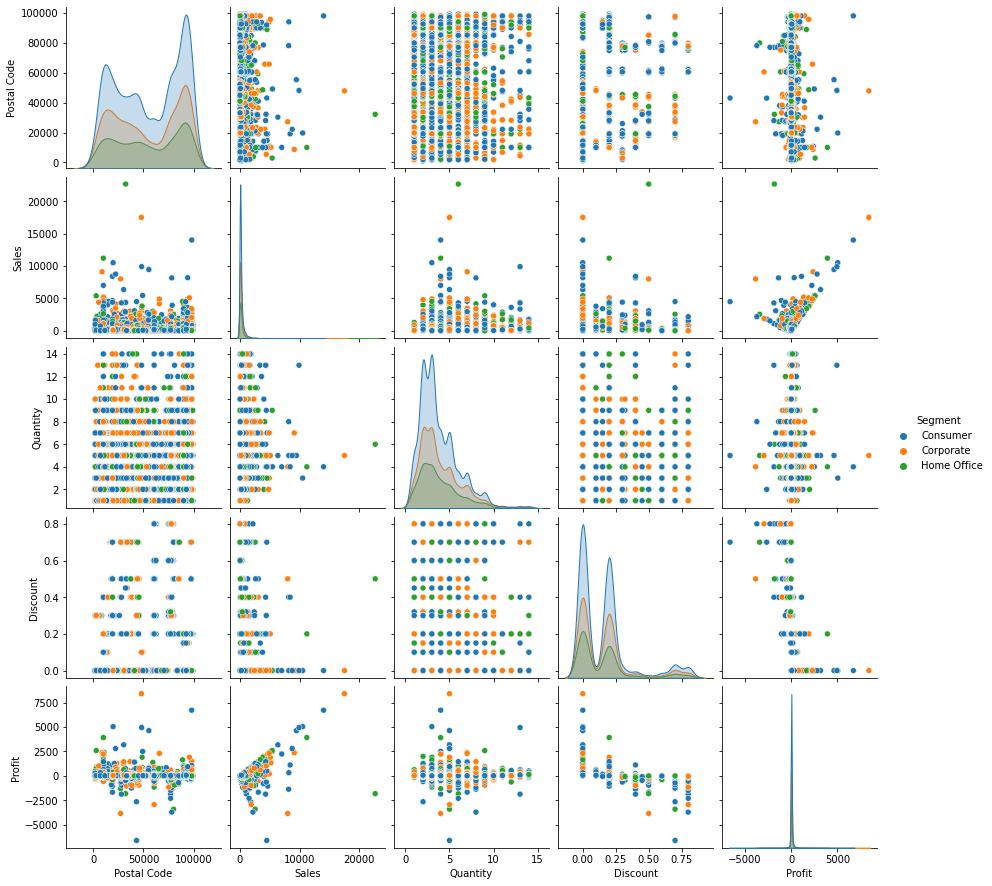

In [16]:
sns.pairplot(store, hue="Segment")

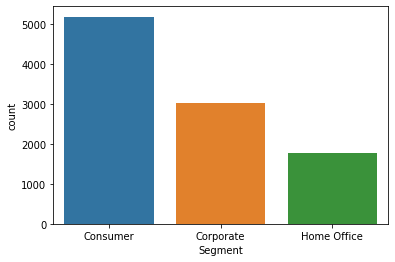

In [17]:
sns.countplot(x=store['Segment'])
plt.show()

In [18]:
store.groupby('Segment').mean()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,55649.895781,223.733644,3.760547,0.158141,25.836873
Corporate,54482.228477,233.823300,3.843709,0.158228,30.456667
Home Office,55051.998317,240.972041,3.782389,0.147128,33.818664


Analysis of Sub-categories

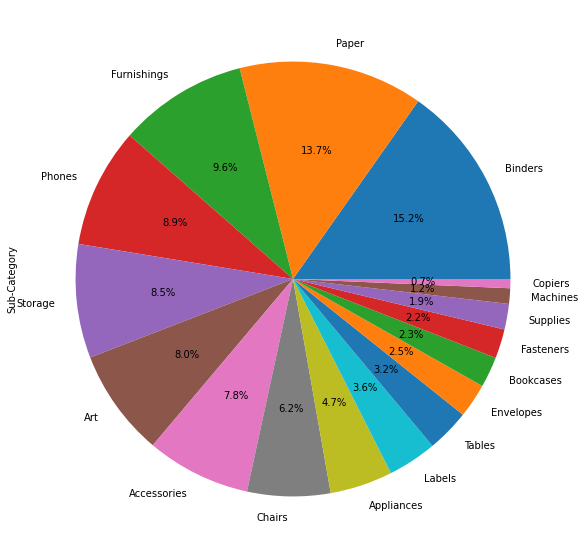

In [19]:
plt.figure(figsize=(12,10))
store['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Analysis on the basis of Location

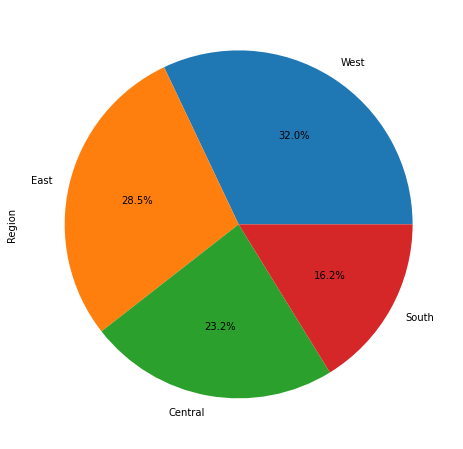

In [20]:
plt.figure(figsize=(10,8))
store['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [21]:
store['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Port Orange        1
Ormond Beach       1
Melbourne          1
Deer Park          1
Murrieta           1
Name: City, Length: 531, dtype: int64

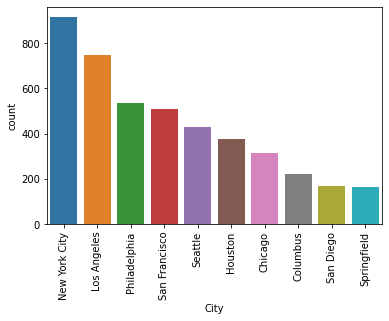

In [22]:
sns.countplot(x=store['City'],order=(store["City"].value_counts().head(10)).index)
plt.xticks(rotation=90)
plt.show()

In [23]:
topCities = store.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
topCities

,City,Quantity
386,Port Orange,1
259,Littleton,1
257,Lindenhurst,1
140,Elyria,1
213,Iowa City,1
...,...,...
452,Seattle,1590
438,San Francisco,1935
374,Philadelphia,1981
266,Los Angeles,2879


In [24]:
topTenCities = topCities.head(10)
topTenCities.reset_index(drop=True,inplace=True)
topTenCities

,City,Quantity
0,Port Orange,1
1,Littleton,1
2,Lindenhurst,1
3,Elyria,1
4,Iowa City,1
5,Jupiter,1
6,Keller,2
7,Grand Island,2
8,Baytown,2
9,Holyoke,2


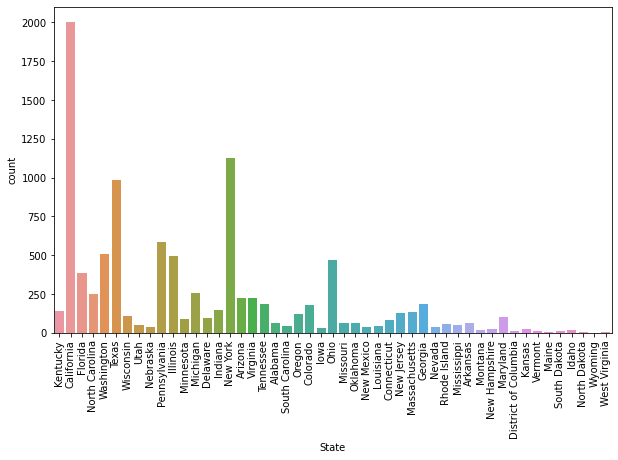

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x=store['State'])
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Quantities ordered')

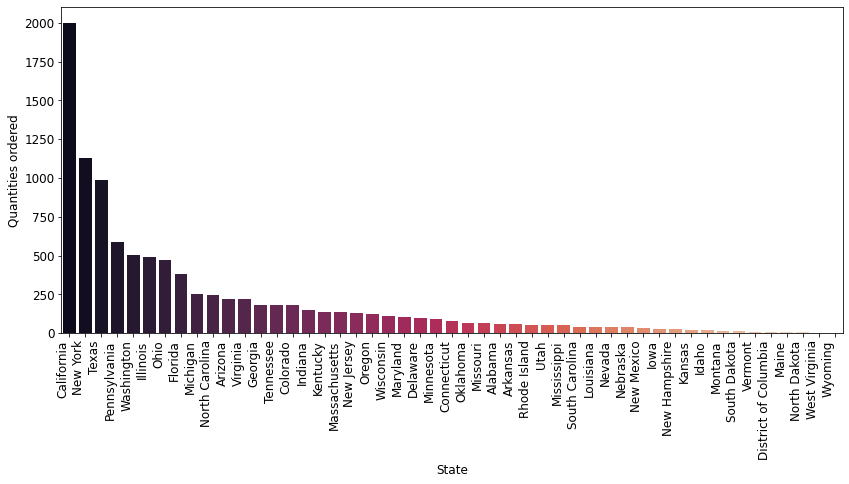

In [26]:
plt.figure(figsize = (14, 6))
sns.countplot(x = store['State'],palette = 'rocket', order = (store['State'].value_counts().head(50)).index)
plt.xticks(rotation=90,ha='right',fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('State',fontsize=12)
plt.ylabel('Quantities ordered',fontsize=12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


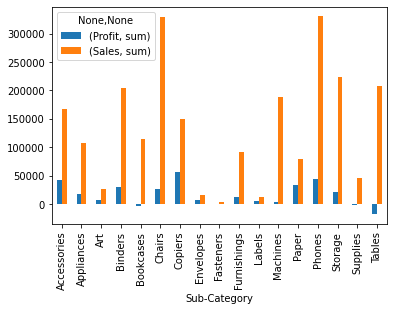

In [27]:
store.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

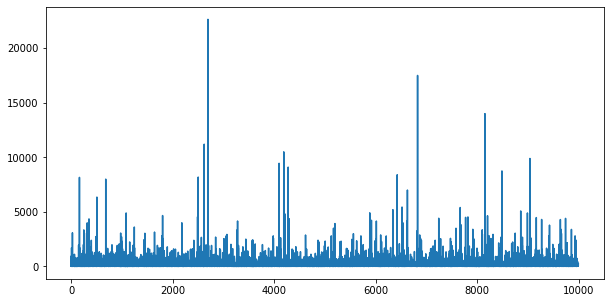

In [28]:
plt.figure(figsize=(10,5))
plt.plot(store['Sales'])
plt.show()

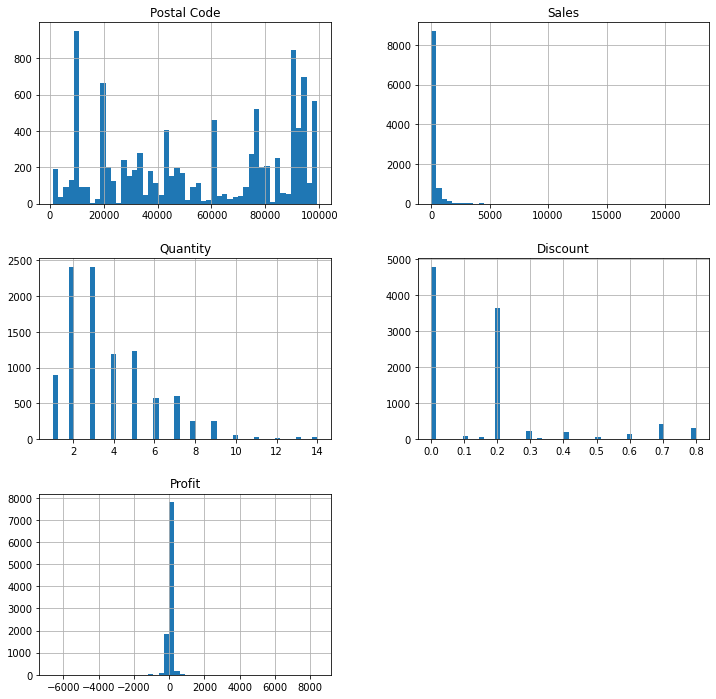

In [29]:
store.hist(figsize=(12,12),bins=50)
plt.show()

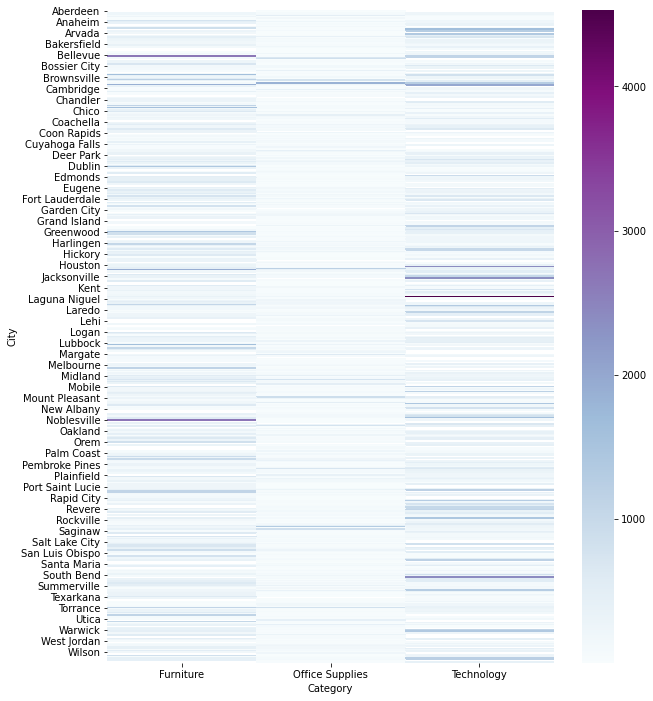

In [30]:
data01 = store[['City','Category', 'State','Sales','Profit']]
heatmapStore01= pd.pivot_table(data01,values='Sales', index=["City"], columns='Category')
plt.figure(figsize=(10, 12))
sns.heatmap(heatmapStore01, cmap="BuPu")

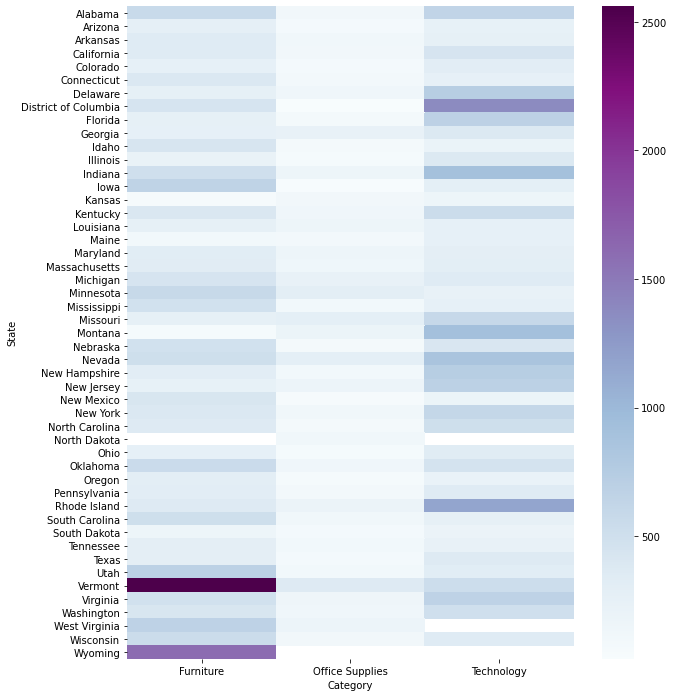

In [31]:
heatmapStore02 = pd.pivot_table(data01,values='Sales', index=["State"], columns='Category')
plt.figure(figsize=(10, 12))
sns.heatmap(heatmapStore02, cmap="BuPu")

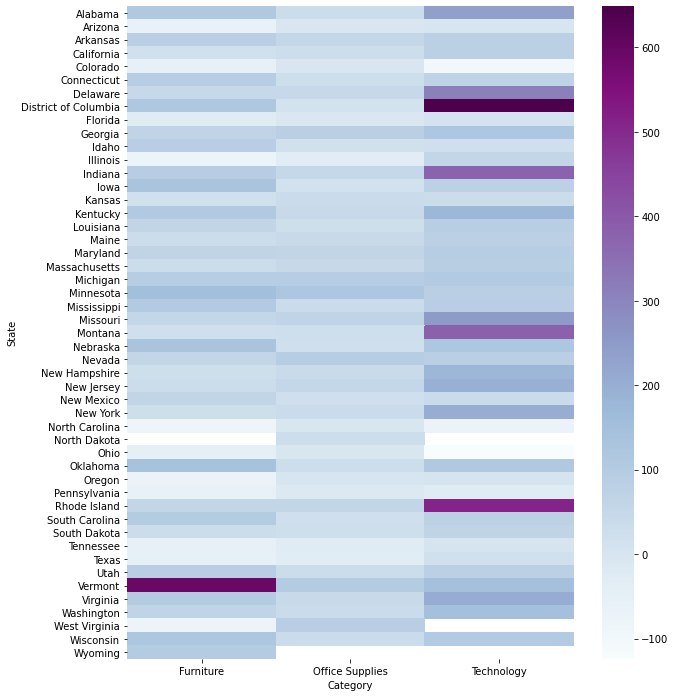

In [32]:
heatmapStore03 = pd.pivot_table(data01,values='Profit', index=["State"], columns='Category')
plt.figure(figsize=(10, 12))
sns.heatmap(heatmapStore03, cmap="BuPu")

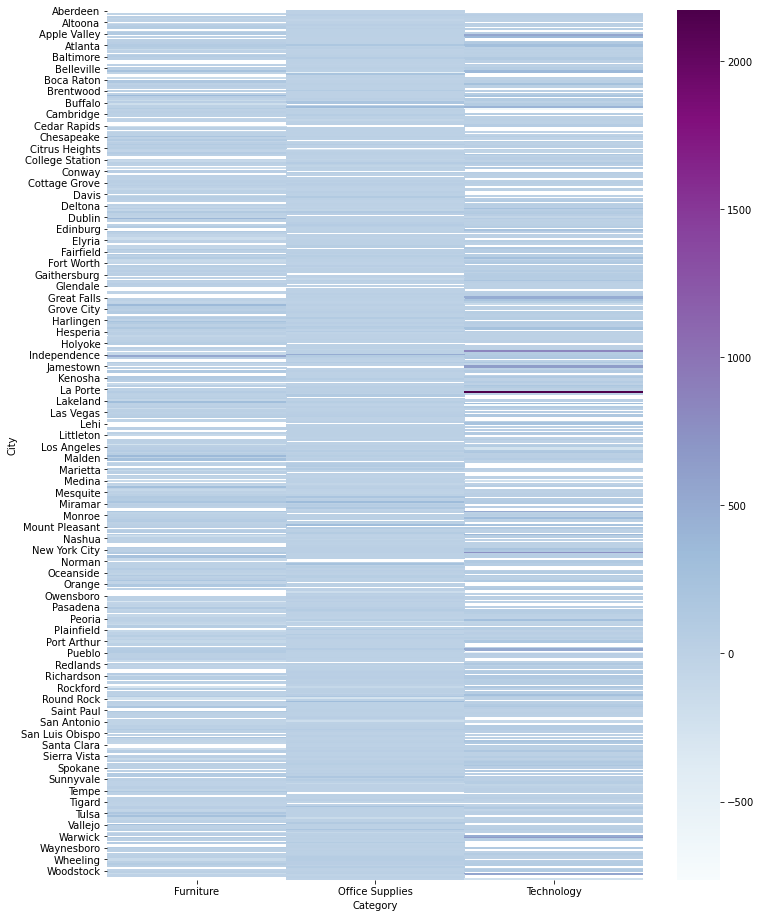

In [33]:
heatmapStore04 = pd.pivot_table(data01,values='Profit', index=["City"], columns='Category')
plt.figure(figsize=(12, 16))
sns.heatmap(heatmapStore04, cmap="BuPu")

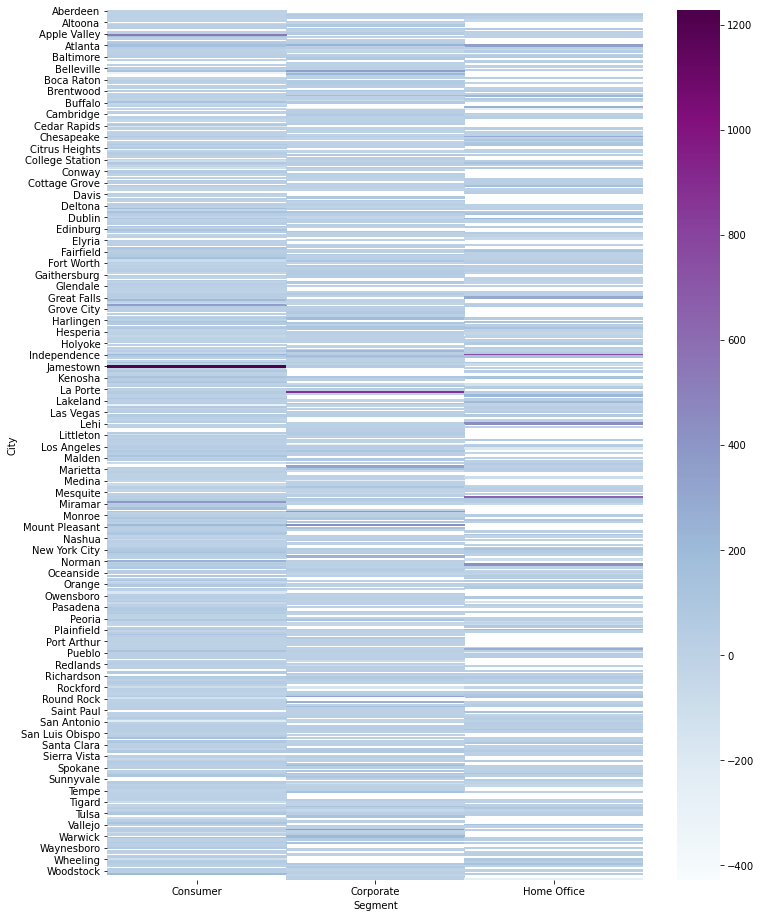

In [34]:
heatmapStore05 = pd.pivot_table(store,values='Profit', index=["City"], columns='Segment')
plt.figure(figsize=(12, 16))
sns.heatmap(heatmapStore05, cmap="BuPu")

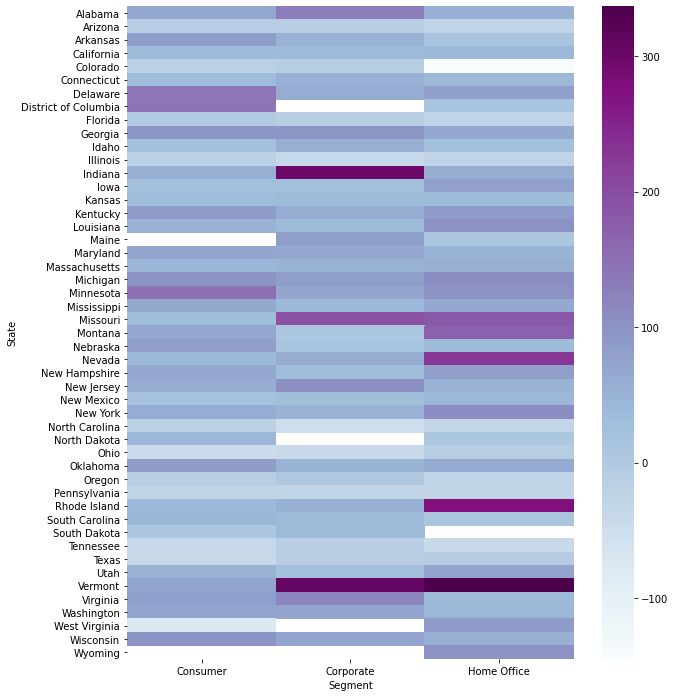

In [35]:
heatmapStore06 = pd.pivot_table(store,values='Profit', index=["State"], columns='Segment')
plt.figure(figsize=(10, 12))
sns.heatmap(heatmapStore06, cmap="BuPu")